In [1]:
import sys
# sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy


def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()


def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class'\
                   'when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running '\
            'on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, 
                   noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, 
          noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128)\
    .clamp(0, 255).to(torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')


In [2]:
device = torch.device('cuda')
with open("PlayerGAN.pkl" , 'rb') as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) 


### Generate and View GANS from Seeds

Seed 55000
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


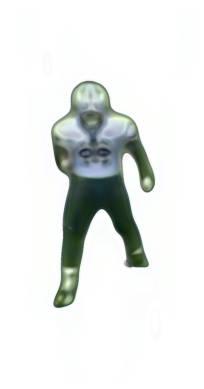

Seed 55001


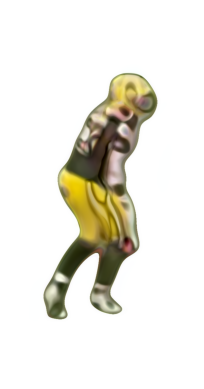

Seed 55002


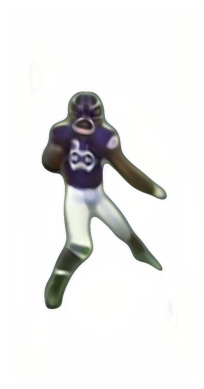

Seed 55003


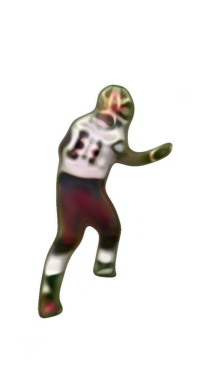

Seed 55004


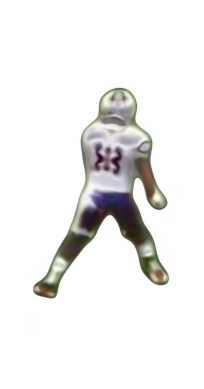

In [8]:
# Choose your own starting and ending seed.
SEED_FROM = 55000
SEED_TO = 55005

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

### Fine-tune an Image

In [9]:
START_SEED = 55004

current = seed2vec(G, START_SEED)


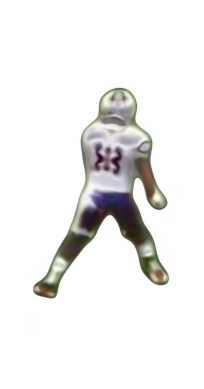

In [10]:
img = generate_image(device, G, current)

SCALE = 0.5
display_image(img)


In [11]:
# Each image displayed from running this code shows a potential direction that we can move in 
# the latent vector. Choose one image that you like and change MOVE_DIRECTION to indicate this decision. 
# Once you rerun the code, the code will give you a new set of potential directions.
# Continue this process until you have a latent vector that you like.

EXPLORE_SIZE = 5

explore = []
for i in range(EXPLORE_SIZE):
  explore.append( np.random.rand(1, 512) - 0.5 )


Direction 0


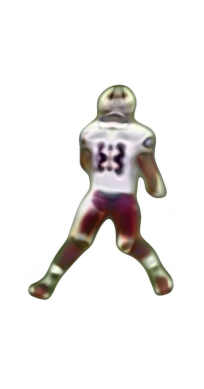

Direction 1


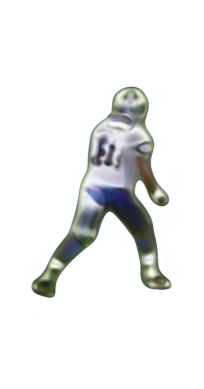

Direction 2


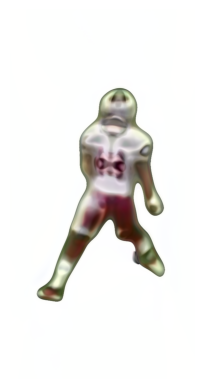

Direction 3


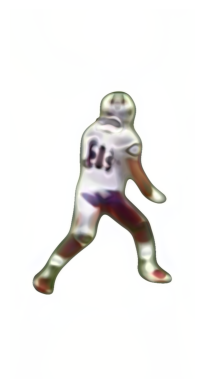

Direction 4


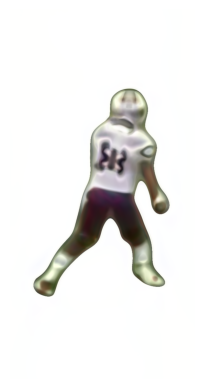

In [12]:
# HIDE OUTPUT 1
# Choose the direction to move.  Choose -1 for the initial iteration.   
MOVE_DIRECTION = -1
SCALE = 0.5

if MOVE_DIRECTION >=0:
  current = current + explore[MOVE_DIRECTION]

for i, mv in enumerate(explore):
  print(f"Direction {i}")
  z = current + mv
  img = generate_image(device, G, z)
  display_image(img)

# Closed Form Factorization

In [ ]:
# 